In [9]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

In [10]:
data_train = pd.read_csv('/content/Dataset/train (1).csv')

data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [23]:
data_train.replace(['female','male'],[0,1],inplace=True)

data_train.fillna(20,inplace=True)

In [24]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,20,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,20,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,20,S


In [35]:
X_train = np.array(data_train[['Pclass','Sex','Age','SibSp','Fare']])
Y_train = np.array(data_train[['Survived']])



In [36]:
model = tf.keras.models.Sequential([
    Dense(5,activation="sigmoid"),
    Dense(18,activation="relu"),
    Dense(10,activation="sigmoid"),
    Dense(2,activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss = tf.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [37]:
history = model.fit(X_train, Y_train,epochs=120)


Epoch 1/120
28/28 [==============================] - 1s 1ms/step - loss: 0.6294 - accuracy: 0.6487
Epoch 2/120
28/28 [==============================] - 0s 1ms/step - loss: 0.5883 - accuracy: 0.6981
Epoch 3/120
28/28 [==============================] - 0s 1ms/step - loss: 0.5782 - accuracy: 0.7160
Epoch 4/120
28/28 [==============================] - 0s 1ms/step - loss: 0.5617 - accuracy: 0.7172
Epoch 5/120
28/28 [==============================] - 0s 1ms/step - loss: 0.5507 - accuracy: 0.7318
Epoch 6/120
28/28 [==============================] - 0s 1ms/step - loss: 0.5244 - accuracy: 0.7565
Epoch 7/120
28/28 [==============================] - 0s 1ms/step - loss: 0.5109 - accuracy: 0.7666
Epoch 8/120
28/28 [==============================] - 0s 1ms/step - loss: 0.5013 - accuracy: 0.7710
Epoch 9/120
28/28 [==============================] - 0s 1ms/step - loss: 0.4922 - accuracy: 0.7755
Epoch 10/120
28/28 [==============================] - 0s 1ms/step - loss: 0.4726 - accuracy: 0.7924
Epoch 11/

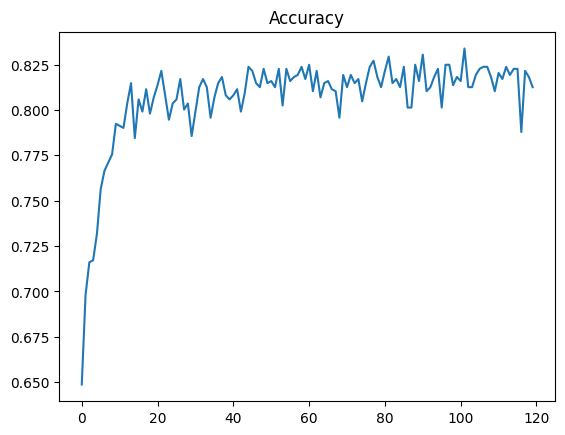

In [53]:
plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.show()

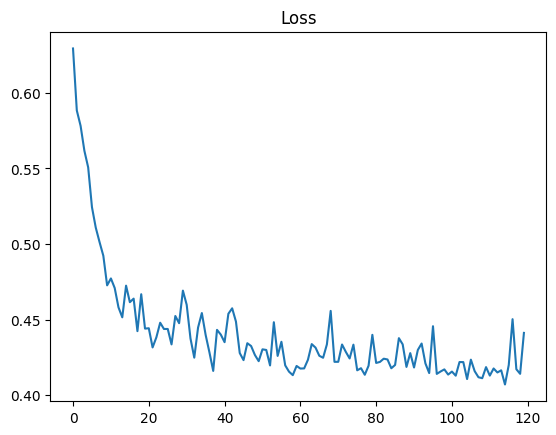

In [54]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.show()

# Test

In [40]:
dataset_X = pd.read_csv('/content/Dataset/test (2).csv')

dataset_X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [41]:
dataset_Y = pd.read_csv('/content/Dataset/gender_submission (1).csv')

dataset_Y

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [42]:
dataset_X.replace(['female','male'],[0,1],inplace=True)

dataset_X.fillna(20,inplace=True)

In [43]:
X_test = np.array(dataset_X[['Pclass','Sex','Age','SibSp','Fare']])

Y_test = np.array(dataset_Y[['Survived']])


In [44]:
evaluate_test = model.evaluate(X_test,Y_test)
evaluate_test

14/14 [==============================] - 0s 1ms/step - loss: 0.2831 - accuracy: 0.9450


[0.2830736041069031, 0.9449760913848877]

In [45]:
jack = [3, 1, 19, 0, 5.0000]
rose = [1,0, 17, 2, 100.0000]


pred = model.predict([jack, rose])

pred = model.predict([jack, rose])
print("Jack Surviving Rate:", pred[0][1])
print("Rose Surviving Rate:", pred[1][1])

1/1 [==============================] - 0s 32ms/step
Jack Surviving Rate: 0.09995563
Rose Surviving Rate: 0.9407409


# KNN

In [46]:
neighbor = KNeighborsClassifier(5)
neighbor

neighbor.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [47]:
y_pred = neighbor.predict(X_test)


In [48]:
acc_knn = accuracy_score(Y_test,y_pred)
acc_knn


0.6698564593301436

# Perceptron

In [51]:
class Perceptron:
    def __init__(self,lr_w=0.001,lr_b=0.01,epochs=1):
        self.lr_w = lr_w
        self.lr_b = lr_b
        self.epoch = epochs
        self.w = np.random.rand(X_train.shape[1],1)
        self.b = np.random.rand(1,1)

    def fit(self,X_train,Y_train):
        Errors = []
        for epoch in range(self.epoch):
            for i in range(X_train.shape[0]):
                y_pred = np.matmul(X_train[i],self.w) + self.b
                e = Y_train[i] - y_pred
                self.w += (e * self.lr_w * X_train[i,:].T).T
                self.b = self.b + e * self.lr_b

    def predict(self,X):
        Y_pred = np.matmul(X,self.w) + self.b
        Y_pred = np.where(Y_pred < 1, 0, 1)
        return Y_pred

In [52]:
perceptron = Perceptron(lr_w=0.0001,lr_b=0.01,epochs=1)
perceptron.fit(X_train,Y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = accuracy_score(Y_test,y_pred)
acc_perceptron

0.5526315789473685